<a href="https://colab.research.google.com/github/joseevandro/Estatistica/blob/main/Evandro_Des_Ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Ifood
## Curso de Estatística do básico ao avançado - *Renata Biaggi*

*Desafio proposto no módulo Estatística Descritiva*

# Preparação do ambiente

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importando algumas bibliotecas que serão utilizadas:

import pandas                as pd
import numpy                 as np
import plotly.express        as pl
import plotly.graph_objects  as go
import seaborn               as sns
import matplotlib.pyplot     as plt 
from scipy import stats


# 1. Análise preliminar dos dados:

In [3]:
# Lendo a nossa tabela .CSV:

df=pd.read_csv("/content/drive/MyDrive/Estudos/EBA/Bases/mkt_data.csv")

In [4]:
df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


In [ ]:
# Qtde de linhas e Colunas:
linhas = len(df)
colunas = len(df.columns)
print("Linhas : ",linhas)
print("Colunas: ",colunas)

Linhas :  2205
Colunas:  44


In [5]:
# Colunas numéricas (geral):
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

In [6]:
# Colunas numéricas (exclusivas):
numerics=["int16","int32","int64","float16","float32","float64"]
df_numeric=df.select_dtypes(include=numerics)
list(df_numeric.columns.values)

['Unnamed: 0',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Age',
 'Customer_Days',
 'marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD',
 'MntTotal',
 'MntRegularProds',
 'AcceptedCmpOverall',
 'kids',
 'expenses']

In [ ]:
# Quantidade de colunas numéricas:
print("Total...: ",len(df_numeric.columns.values))

Total...:  42


In [ ]:
# Verificando se existem dados duplicados:
duplicados = df.duplicated()
duplicados.sum()

0

In [ ]:
# Verificando a existência de dados nulos:
df.isnull().sum()

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

In [ ]:
# Verificando o % de dados nulos existentes na coluna em relação ao total de linhas:

df.isnull().sum()/df.shape[0]*100

Unnamed: 0               0.000000
Income                   0.000000
Kidhome                  0.000000
Teenhome                 0.000000
Recency                  0.000000
MntWines                 0.000000
MntFruits                0.000000
MntMeatProducts          0.000000
MntFishProducts          0.000000
MntSweetProducts         0.000000
MntGoldProds             0.000000
NumDealsPurchases        0.000000
NumWebPurchases          0.000000
NumCatalogPurchases      0.000000
NumStorePurchases        0.000000
NumWebVisitsMonth        0.000000
AcceptedCmp3             0.000000
AcceptedCmp4             0.000000
AcceptedCmp5             0.000000
AcceptedCmp1             0.000000
AcceptedCmp2             0.000000
Complain                 0.000000
Z_CostContact            0.000000
Z_Revenue                0.000000
Response                 0.000000
Age                      0.000000
Customer_Days            0.000000
marital_Divorced        89.569161
marital_Married         61.269841
marital_Single

In [ ]:
# Como existem colunas que apresentam uma quantidade discrepantes de dados nulos, que não são relevantes em nossa 
# análise, iremos eliminá-las e utilizar as colunas correspondentes "marital_status"
# e "education_level" como melhor medida a ser aplicada:

df_clean=df.dropna(inplace=False, axis=1)
df_clean

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,1,63,2822,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,66,2272,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,55,2471,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,0,36,2298,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,39,2320,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,0,53,2540,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,0,74,2178,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,0,39,2314,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,0,64,2315,782,721,0,Together,Master,1,782


In [ ]:
# média, mediana, 25 percentil, 75 percentil, mínimo e máximo das colunas numéricas:
df_clean.describe()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,1102.000000,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,...,3.0,11.0,0.15102,51.095692,2512.718367,562.764626,518.707483,0.29932,0.948753,562.764626
std,636.672993,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,...,0.0,0.0,0.35815,11.705801,202.563647,575.936911,553.847248,0.68044,0.749231,575.936911
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.0,11.0,0.00000,24.000000,2159.000000,4.000000,-283.000000,0.00000,0.000000,4.000000
25%,551.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,3.0,11.0,0.00000,43.000000,2339.000000,56.000000,42.000000,0.00000,0.000000,56.000000
50%,1102.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,...,3.0,11.0,0.00000,50.000000,2515.000000,343.000000,288.000000,0.00000,1.000000,343.000000
75%,1653.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,...,3.0,11.0,0.00000,61.000000,2688.000000,964.000000,884.000000,0.00000,1.000000,964.000000
max,2204.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,3.0,11.0,1.00000,80.000000,2858.000000,2491.000000,2458.000000,4.00000,3.000000,2491.000000


<Axes: >

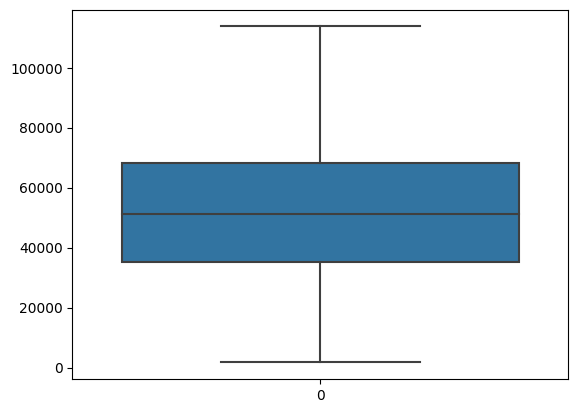

In [ ]:
#boxplot
sns.boxplot(df.Income)
#df.Income é igual df["Income"]

# 2. Entendendo o perfil dos Clientes Ifood:

In [ ]:
# O maior salário da nossa base de dados:

df["Income"].max()

113734.0

(array([ 3.,  5., 16.,  7.,  6., 19., 30., 36., 34., 66., 53., 66., 67.,
        61., 86., 86., 83., 74., 74., 81., 63., 76., 67., 75., 70., 68.,
        71., 77., 85., 65., 82., 68., 58., 63., 60., 64., 44., 28., 17.,
        20., 13.,  8.,  3.,  2.,  2.,  1.,  1.,  0.,  0.,  1.]),
 array([  1730.  ,   3970.08,   6210.16,   8450.24,  10690.32,  12930.4 ,
         15170.48,  17410.56,  19650.64,  21890.72,  24130.8 ,  26370.88,
         28610.96,  30851.04,  33091.12,  35331.2 ,  37571.28,  39811.36,
         42051.44,  44291.52,  46531.6 ,  48771.68,  51011.76,  53251.84,
         55491.92,  57732.  ,  59972.08,  62212.16,  64452.24,  66692.32,
         68932.4 ,  71172.48,  73412.56,  75652.64,  77892.72,  80132.8 ,
         82372.88,  84612.96,  86853.04,  89093.12,  91333.2 ,  93573.28,
         95813.36,  98053.44, 100293.52, 102533.6 , 104773.68, 107013.76,
        109253.84, 111493.92, 113734.  ]),
 <BarContainer object of 50 artists>)

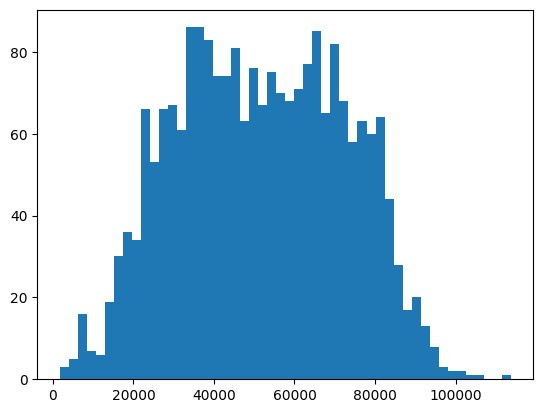

In [52]:
# A distribuição de salário na nossa base de dados:
plt.hist(df['Income'], bins =50)

<ipython-input-50-a21ea0901295>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], bins=10, hist=False)


<Axes: xlabel='Income', ylabel='Density'>

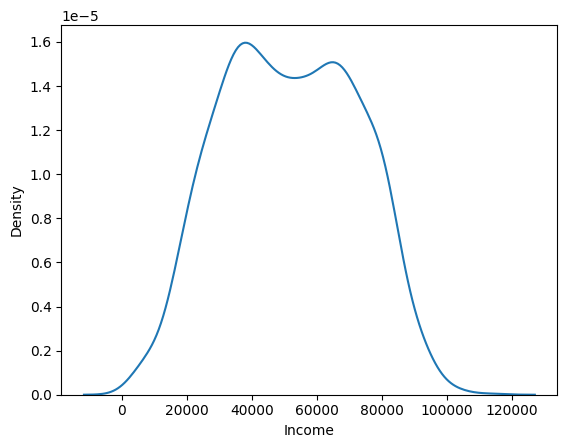

In [50]:
# Densidade alisada:

sns.distplot(df['Income'], bins=10, hist=False)

In [ ]:
# Agora vamos ver o desvio padrão:

desvio = df['Income'].std()
desvio

20713.06382588019

In [ ]:
# Coeficiente de variância:

coef_var =  (desvio/df['Income'].mean())*100
coef_var

40.12441554786958

O coeficiente de variância é de 40%, ou seja, o nosso desvio padrão representa 40% da nossa média.

Calculando o Skew conseguimos entender onde os outliers estão mais concentrados

In [ ]:
#Simetria
from scipy.stats import skew
skew(df['Income'])

0.013155306440415357

In [ ]:
# Níveis de educação dos clientes:

df["education_level"].value_counts()

Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: education_level, dtype: int64

In [ ]:
# Níveis de educação dos clientes em %:

df["education_level"].value_counts()/df.shape[0]*100

Graduation    50.476190
PhD           21.587302
Master        16.507937
2n Cycle       8.979592
Basic          2.448980
Name: education_level, dtype: float64

In [ ]:
# Clientes em cada estado civil:

df["marital_status"].value_counts()


Married     854
Together    568
Single      477
Divorced    230
Widow        76
Name: marital_status, dtype: int64

In [ ]:
# Clientes em cada estado civil %:

df["marital_status"].value_counts()/df.shape[0]*100

Married     38.730159
Together    25.759637
Single      21.632653
Divorced    10.430839
Widow        3.446712
Name: marital_status, dtype: float64

# 3. Como os dados se correlacionam:

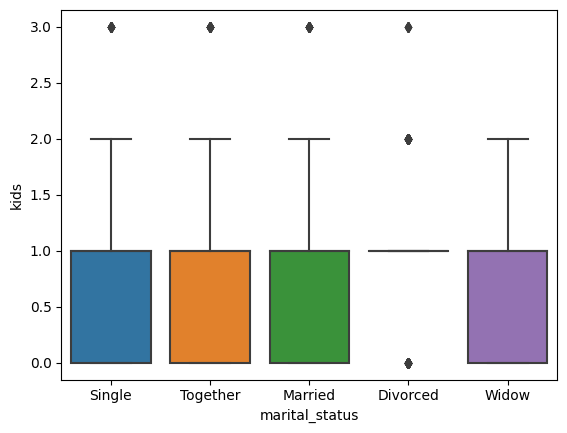

In [13]:
# Verificando a relação do estado civil com a quantidade de filhos:
ax = sns.boxplot(x='marital_status', y='kids', data=df)

In [45]:
# Média de filhos por estado civil:

c_mean = df.groupby('marital_status')['kids'].mean()
c_mean

marital_status
Divorced    1.008696
Married     0.967213
Single      0.859539
Together    0.980634
Widow       0.881579
Name: kids, dtype: float64

In [8]:
# Acrescentando a coluna "estado_civil e verificando a relação entre estado civil e quantidade de filhos:"

condicoes = [(df["marital_status"] == "Divorced"),
             (df["marital_status"] == "Married"),
             (df["marital_status"] == "Single"),
             (df["marital_status"] == "Together"),
             (df["marital_status"] == "Widow")]
opcoes = [3,1,2,4,5]
df["estado_civil"] = np.select(condicoes,opcoes)             

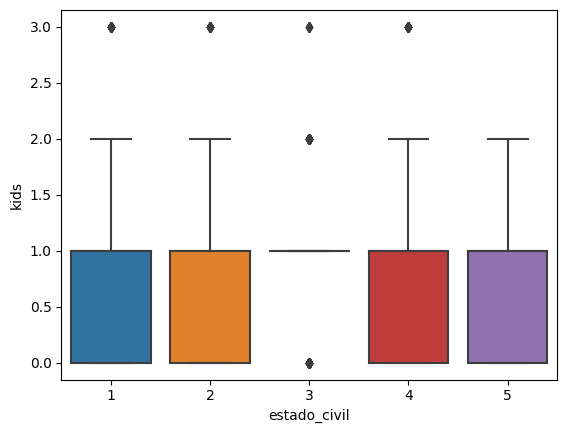

In [14]:
ax = sns.boxplot(x='estado_civil', y='kids', data=df)

In [11]:
# Verificando a correlação entre as despesas com o salário:
df["expenses"].corr(df["Income"])

0.8230660021398378

<Axes: xlabel='expenses', ylabel='Income'>

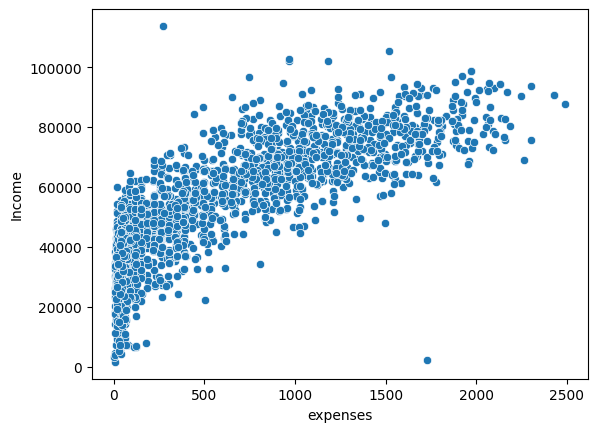

In [ ]:
sns.scatterplot( data=df, x='expenses', y='Income')

In [46]:
# Verificando a relação de despesas com a quantidade de filhos:
df["expenses"].corr(df["kids"])

-0.49902507062615514

<Axes: xlabel='expenses', ylabel='kids'>

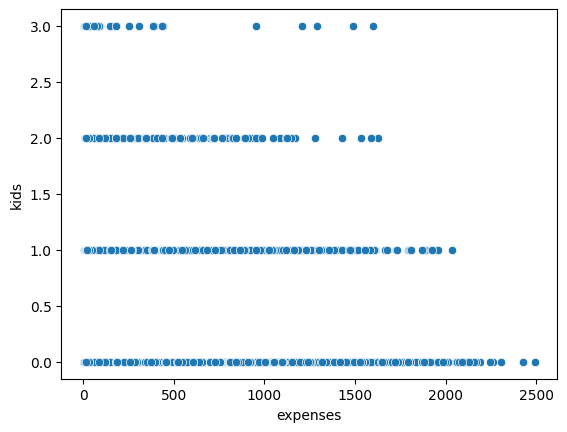

In [47]:
sns.scatterplot( data=df, x='expenses', y='kids')